In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
import joblib

## 1. Load dataset

In [2]:
df = pd.read_csv("HR-Employee-Attrition.csv")
df.shape

(1470, 35)

In [3]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


## 2. Basic EDA

In [4]:
df["Attrition"].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

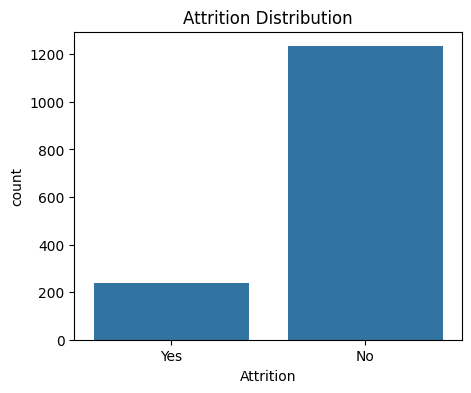

In [5]:
plt.figure(figsize=(5,4))
sns.countplot(data=df, x="Attrition")
plt.title("Attrition Distribution")
plt.show()

### Attrition by Gender

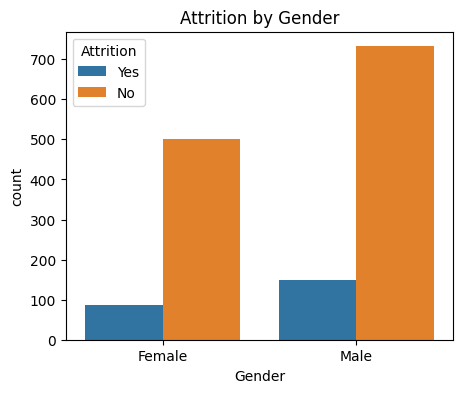

In [6]:
plt.figure(figsize=(5,4))
sns.countplot(data=df, x="Gender", hue="Attrition")
plt.title("Attrition by Gender")
plt.show()

### Attrition by Age

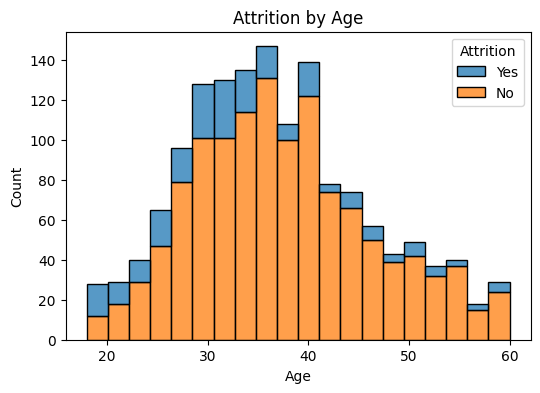

In [7]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x="Age", hue="Attrition", multiple="stack", bins=20)
plt.title("Attrition by Age")
plt.show()

### Attrition by Job Role

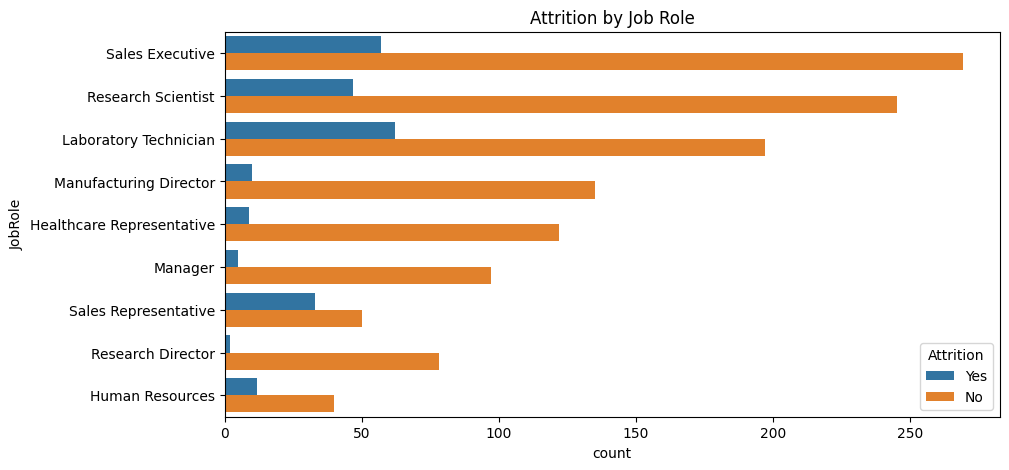

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y="JobRole", hue="Attrition")
plt.title("Attrition by Job Role")
plt.show()

### Monthly Income distribution

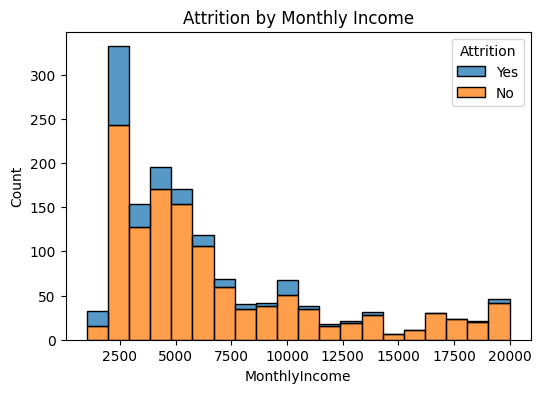

In [9]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x="MonthlyIncome", hue="Attrition", multiple="stack", bins=20)
plt.title("Attrition by Monthly Income")
plt.show()

### Years at Company vs Attrition

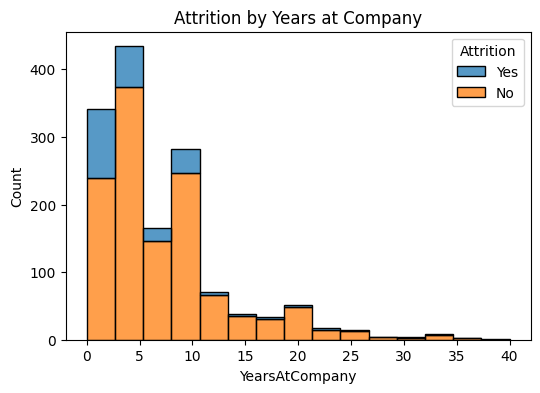

In [10]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x="YearsAtCompany", hue="Attrition", multiple="stack", bins=15)
plt.title("Attrition by Years at Company")
plt.show()

## 3. Identify target column

In [11]:
target_col = "Attrition"
df["target"] = df[target_col].map(lambda x: 1 if str(x).strip().lower() in ["yes", "y", "1", "true", "t", "left"] else 0)

In [12]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,target
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,80,1,17,3,3,5,2,0,3,0
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,80,1,9,5,3,7,7,1,7,0
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,80,1,6,0,3,6,2,0,3,0
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,80,0,17,3,2,9,6,0,8,0


## 4. Prepare features

In [13]:
drop_cols = [target_col, "EmployeeNumber", "EmployeeID", "Employee_Id", "EmployeeId"]
X = df.drop(columns=[c for c in drop_cols if c in df.columns] + ["target"], errors='ignore')
y = df["target"]

In [14]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,Male,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,3,Male,...,3,80,1,17,3,3,5,2,0,3
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,4,Male,...,1,80,1,9,5,3,7,7,1,7
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2,Male,...,2,80,1,6,0,3,6,2,0,3
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,1,4,Male,...,4,80,0,17,3,2,9,6,0,8


In [15]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: target, Length: 1470, dtype: int64

### Separate numeric & categorical columns

In [16]:
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
numeric_cols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [17]:
cat_cols = X.select_dtypes(include=["object", "category", "bool"]).columns.tolist()
cat_cols

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

## 5. Preprocessing

In [18]:
numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])

In [19]:
categorical_transformer = Pipeline(steps=[("onehot", OneHotEncoder(handle_unknown="ignore", drop='if_binary', sparse_output=False))])

In [20]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)

## 6. Train/test split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [22]:
X_train

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1194,47,Travel_Rarely,1225,Sales,2,4,Life Sciences,1,2,Female,...,3,80,3,29,2,3,3,2,1,2
128,22,Travel_Rarely,594,Research & Development,2,1,Technical Degree,1,3,Male,...,3,80,1,3,2,3,2,1,2,1
810,46,Travel_Rarely,406,Sales,3,1,Marketing,1,1,Male,...,4,80,1,23,3,3,12,9,4,9
478,25,Travel_Rarely,622,Sales,13,1,Medical,1,2,Male,...,3,80,0,7,1,3,7,4,0,6
491,43,Travel_Frequently,1001,Research & Development,9,5,Medical,1,4,Male,...,2,80,1,10,3,3,8,7,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,23,Travel_Rarely,427,Sales,7,3,Life Sciences,1,3,Male,...,2,80,1,3,2,3,3,2,0,2
963,38,Travel_Rarely,1009,Sales,2,2,Life Sciences,1,2,Female,...,4,80,1,11,3,3,7,7,1,7
734,22,Travel_Rarely,217,Research & Development,8,1,Life Sciences,1,2,Male,...,1,80,1,4,3,2,4,3,1,1
1315,36,Travel_Rarely,430,Research & Development,2,4,Other,1,4,Female,...,4,80,1,15,2,3,1,0,0,0


In [23]:
X_test

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1061,24,Non-Travel,830,Sales,13,2,Life Sciences,1,4,Female,...,3,80,1,1,2,3,1,0,0,0
891,44,Travel_Rarely,1117,Research & Development,2,1,Life Sciences,1,1,Female,...,4,80,1,10,5,3,10,5,7,7
456,31,Travel_Rarely,688,Sales,7,3,Life Sciences,1,3,Male,...,3,80,1,10,3,2,5,4,0,1
922,44,Travel_Rarely,1199,Research & Development,4,2,Life Sciences,1,3,Male,...,4,80,2,26,4,2,25,9,14,13
69,36,Travel_Rarely,318,Research & Development,9,3,Medical,1,4,Male,...,1,80,1,2,0,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,43,Travel_Rarely,244,Human Resources,2,3,Life Sciences,1,2,Male,...,2,80,0,10,5,3,9,7,1,8
1352,44,Travel_Rarely,170,Research & Development,1,4,Life Sciences,1,2,Male,...,4,80,1,10,5,3,2,0,2,2
1236,36,Travel_Rarely,1456,Sales,13,5,Marketing,1,2,Male,...,2,80,3,16,3,3,2,2,2,2
1023,56,Travel_Rarely,1255,Research & Development,1,2,Life Sciences,1,1,Female,...,4,80,1,5,3,4,3,2,1,0


In [24]:
y_train

1194    0
128     0
810     0
478     0
491     0
       ..
1213    1
963     0
734     0
1315    0
1292    0
Name: target, Length: 1176, dtype: int64

In [25]:
y_test

1061    0
891     0
456     0
922     0
69      1
       ..
1269    0
1352    0
1236    1
1023    0
285     0
Name: target, Length: 294, dtype: int64

## 7. Define models

In [26]:
log_clf = Pipeline(steps=[("pre", preprocessor), ("clf", LogisticRegression(max_iter=2000, random_state=42))])

In [27]:
rf_clf = Pipeline(steps=[("pre", preprocessor), ("clf", RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1))])

In [28]:
models = {"Logistic Regression": log_clf, "Random Forest": rf_clf}
results = {}

## 8. Train & evaluate

In [29]:
for name, model in models.items():
    print(f"-------------------- Training {name} --------------------")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    results[name] = {"model": model, "roc_auc": roc_auc, "y_prob": y_prob}
    
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
    print("\n")

-------------------- Training Logistic Regression --------------------
Accuracy: 0.8605
Precision: 0.6154
Recall: 0.3404
F1 Score: 0.4384
ROC AUC: 0.8108
Confusion Matrix:
 [[237  10]
 [ 31  16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.62      0.34      0.44        47

    accuracy                           0.86       294
   macro avg       0.75      0.65      0.68       294
weighted avg       0.84      0.86      0.84       294



-------------------- Training Random Forest --------------------
Accuracy: 0.8299
Precision: 0.3636
Recall: 0.0851
F1 Score: 0.1379
ROC AUC: 0.8024
Confusion Matrix:
 [[240   7]
 [ 43   4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.91       247
           1       0.36      0.09      0.14        47

    accuracy                           0.83       294
   macro avg       

## 9. ROC Curve

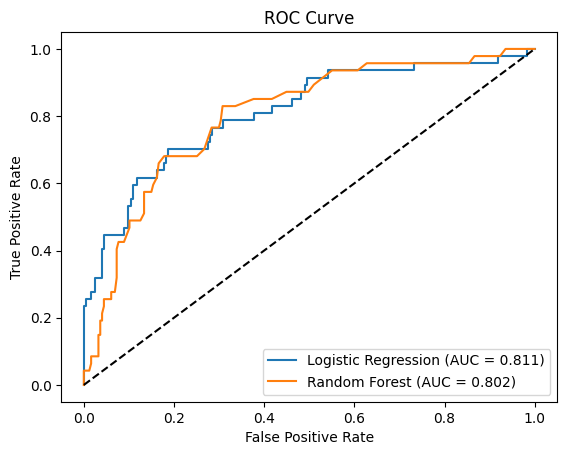

In [30]:
plt.figure()
for name, res in results.items():
    fpr, tpr, _ = roc_curve(y_test, res["y_prob"])
    plt.plot(fpr, tpr, label=f"{name} (AUC = {res['roc_auc']:.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## 10. Feature Importances (Random Forest)

In [31]:
rf_model = results["Random Forest"]["model"]

### Get feature names after preprocessing

In [32]:
feature_names = rf_model.named_steps["pre"].get_feature_names_out()
importances = rf_model.named_steps["clf"].feature_importances_
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

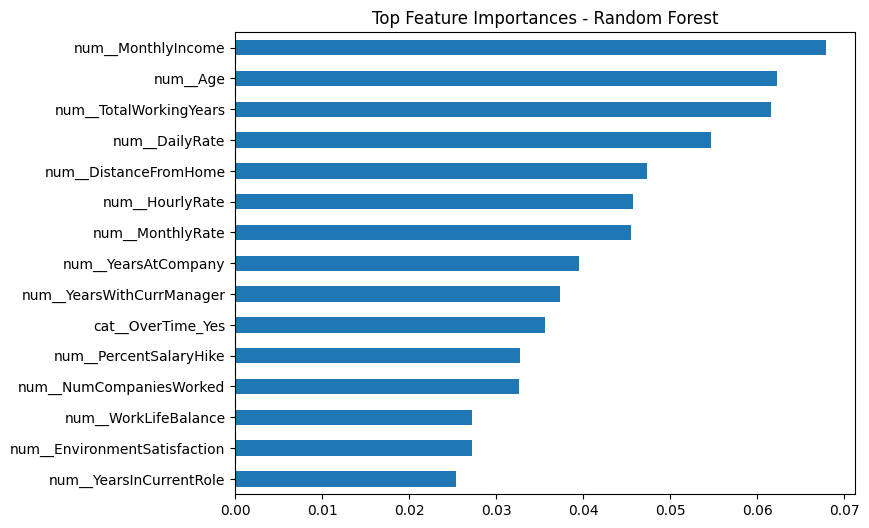

In [33]:
plt.figure(figsize=(8, 6))
feat_imp.head(15).sort_values().plot(kind="barh")
plt.title("Top Feature Importances - Random Forest")
plt.show()

## 11. Save best model

In [34]:
best_model_name = max(results, key=lambda k: results[k]["roc_auc"])
best_model = results[best_model_name]["model"]
joblib.dump(best_model, "best_attrition_model.joblib")
best_model_name

'Logistic Regression'

## 12. Example Prediction

In [35]:
def predict_row(row_dict):
    row_df = pd.DataFrame([row_dict])
    pred = best_model.predict(row_df)[0]
    prob = best_model.predict_proba(row_df)[0, 1]
    return {"prediction": int(pred), "probability": float(prob)}

In [36]:
sample_rows = X_test.sample(3, random_state=42)

print("\nExample Predictions:\n")
for i, row in sample_rows.iterrows():
    result = predict_row(row.to_dict())
    print(f"Employee ID: {i}")
    print(f"Prediction: {'Will Leave' if result['prediction'] == 1 else 'Will Stay'}")
    print(f"Probability of Leaving: {result['probability']:.2%}")
    print("-" * 40)


Example Predictions:

Employee ID: 821
Prediction: Will Stay
Probability of Leaving: 5.36%
----------------------------------------
Employee ID: 1311
Prediction: Will Stay
Probability of Leaving: 9.72%
----------------------------------------
Employee ID: 1241
Prediction: Will Stay
Probability of Leaving: 26.65%
----------------------------------------
